# For each question, make sure to:

1. State your Null Hypothesis and Alternative Hypothesis
2. Select the correct test according to the data type and number of samples
3. Test the assumptions of your selected test.
4. Execute the selected test, or the alternative test (if you do not meet the assumptions)
5. Interpret your p-value and reject or fail to reject your null hypothesis 
6. Show a supporting visualization that helps display the result


In [1]:
# Imports
#Numpy
import numpy as np
#Pandas
import pandas as pd
#Matplotib
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns

import scipy.stats as stats

from statsmodels.stats.multicomp import pairwise_tukeyhsd


## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# CSV File
filename  = 'Data/insurance.csv'
df = pd.read_csv(filename)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Q1. Do smokers have higher insurance charges than non-smokers?

- Null Hypothesis: Smokers and non-smokers have similar insurance charges.

- Alternative Hypothesis: Smokers do have higher charges than non-smokers.

- Establish features

In [3]:
# Filtering out smokers and non smokers
smoker_df = df.loc[df['smoker']== 'yes'].copy()
non_smoker_df = df.loc[df['smoker']== 'no'].copy()
# Filter for feature 'charges'
smoker_chg = smoker_df['charges']
non_smoker_chg = non_smoker_df['charges']

- Test for outliers

In [4]:
# Outliers for smokers
zscores_s = stats.zscore(smoker_chg)
outliers_s = abs(zscores_s)>3
np.sum(outliers_s)

0

In [5]:
# Outliers for non_smokers
zscores_ns = stats.zscore(non_smoker_chg)
outliers_ns = abs(zscores_ns)>3
np.sum(outliers_ns)

24

In [6]:
# remove outliers from non_smokers
non_smoker_chg = non_smoker_chg[(np.abs(stats.zscore(non_smoker_chg)) < 3)]

- Test for normality

In [7]:
# normal test smokers
result_s = stats.normaltest(smoker_chg)
result_s

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [8]:
# normal test non_smokers
result_ns = stats.normaltest(non_smoker_chg)
result_ns

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

- Test for Equal Variance

In [9]:
# equal variance test
result = stats.levene(smoker_chg, non_smoker_chg)
print(result)
# is the p-value less than 0.05?
result.pvalue < .05
# result is less than 0.05

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)


True

- Run Independent t- test 

In [10]:
# independent/ scipy.stats.ttest_ind

# Independent t-test with equal_var set to False
result = stats.ttest_ind(smoker_chg, non_smoker_chg, equal_var = False)
result



Ttest_indResult(statistic=33.732305987092516, pvalue=2.5753226625873578e-104)

In [11]:
## is our result significant
print(f"p-value={result.pvalue:.10f}")
print(f"Significant: {result.pvalue <.05}")


p-value=0.0000000000
Significant: True


**Conclusion:**

Reject Null Hypothesis: Smokers do have higher insurance charges than non_smokers.

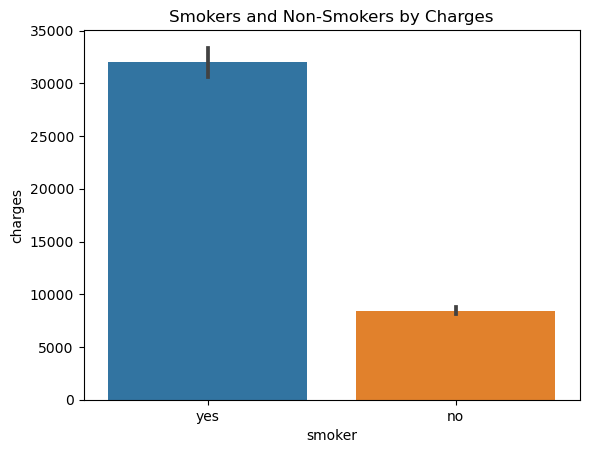

In [12]:
ax = sns.barplot(x=df['smoker'], y = df['charges'])
ax.set_title('Smokers and Non-Smokers by Charges');

# Q2. Are men more likely to smoke than women?

- Null Hypothesis: Men are not more likely to smoke than women.

- Alternative Hypothesis: Men are more likely to smoke than women.

In [13]:
# Chi-Squared
# calculate the contingency table
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [14]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
#label the results
chi2, p, deg_free, expected_vals = result 

In [15]:
# Get p-value
print(p)
p<.05

0.006548143503580696


True

- Fail to Reject Null Hypothesis: Men are more likely to smoke than women

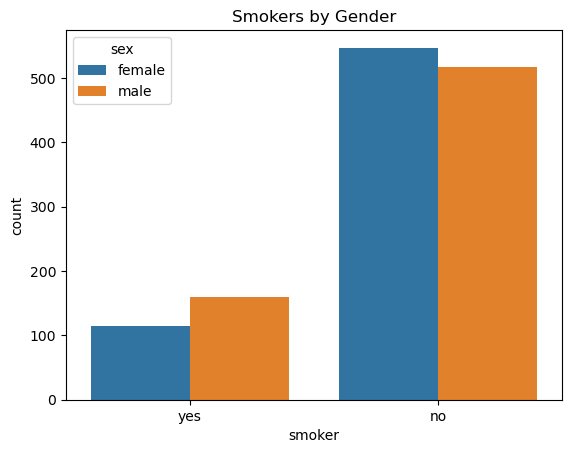

In [16]:
ax = sns.countplot(x=df['smoker'], hue = df['sex'])
ax.set_title('Smokers by Gender');

# Q3. Do different regions have different charges, on average?

- Null Hypothesis: There is no difference in charges for each region.

- Alternative Hypothesis: Different regions have different charges.

In [17]:
## Create empty dictionary. 
region = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    region[i] = data
region.keys()



dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [18]:
# Outliers for SW
zscores_sw = stats.zscore(region['southwest'])
outliers_sw = abs(zscores_sw)>3
np.sum(outliers_sw)

8

In [19]:
# remove outliers from SW
region['southwest'] = region['southwest'][(np.abs(stats.zscore(region['southwest'])) < 3)]

In [20]:
# Outliers for SE
zscores_se = stats.zscore(region['southeast'])
outliers_se = abs(zscores_se)>3
np.sum(outliers_se)

2

In [21]:
# remove outliers from SE
region['southeast'] = region['southeast'][(np.abs(stats.zscore(region['southeast'])) < 3)]

In [22]:
# Outliers for NW
zscores_nw = stats.zscore(region['northwest'])
outliers_nw = abs(zscores_nw)>3
np.sum(outliers_nw)

7

In [23]:
# remove outliers from NW
region['northwest'] = region['northwest'][(np.abs(stats.zscore(region['northwest'])) < 3)]

In [24]:
# Outliers for NE
zscores_ne = stats.zscore(region['northeast'])
outliers_ne = abs(zscores_ne)>3
np.sum(outliers_ne)

4

In [25]:
# remove outliers from NE
region['northeast'] = region['northeast'][(np.abs(stats.zscore(region['northeast'])) < 3)]

In [26]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in region.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df


,n,p,test stat
southwest,317.0,7.728611e-22,97.223886
southeast,362.0,1.936990e-13,58.544942
northwest,318.0,2.940543e-19,85.341045
northeast,320.0,3.557877e-17,75.749565


In [27]:
### checking significance with pandas 
norm_results_df['significance'] = norm_results_df['p'] < .05 
norm_results_df


,n,p,test stat,significance
southwest,317.0,7.728611e-22,97.223886,True
southeast,362.0,1.936990e-13,58.544942,True
northwest,318.0,2.940543e-19,85.341045,True
northeast,320.0,3.557877e-17,75.749565,True


Above they do not have normal distribution but we have more than 15 per region, so we move on.

In [29]:
# Test for equal variance with * operator to select all
l_results = stats.levene(*region.values())
print(l_results)
# is the p-value less than 0.05?
l_results.pvalue < .05

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)


True

variance is below 0.05, there is not equal variance

In [30]:
stats.kruskal(*region.values())

KruskalResult(statistic=6.914045702545643, pvalue=0.07468847911322242)

- p value is higher than .05. 

Fail to Reject Null Hypothesis: There is a difference in charges between the Southeast and Southwest regions

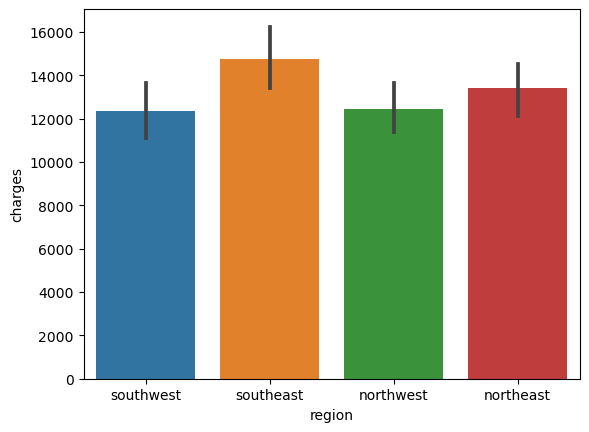

In [31]:
sns.barplot(data=df, x='region',y='charges');